# BUSINESS UNDERSTANDING

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

# modelos
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier: el equivalente del Adaline
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression

# metricas
import sklearn.metrics as metrics

# hiperparametrizado
from sklearn.model_selection import GridSearchCV

# interpretabilidad
import shap

# para visualizar mas columnas en un df
pd.set_option('display.max_columns',None)

# guradar modelo
import pickle

# quitar alertas
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

/Users/albertfdez/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_train = pd.read_csv("Dataset/train.csv")
df_predecir = pd.read_csv("Dataset/test.csv")


In [5]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df_predecir.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_predecir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
del (df_train["Name"])
del (df_predecir["Name"])

# EXPLORATORY DATA ANALISYS & PREPROCESSING

## TRAIN NULOS

In [10]:
df_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### AGE

In [ ]:
# Seleccionar la columna que deseas imputar
columna = df_train[['Age']] 

# Crear y aplicar el imputador
imputer = KNNImputer(n_neighbors=2)

columna_imputed = imputer.fit_transform(columna)

df_train['Age'] = columna_imputed

#### CABIN

In [12]:
df_train['Cabin_presence'] = df_train['Cabin'].notnull().astype(int)

df_train["Cabin"] = df_train["Cabin"].fillna("No cabin")


#### EMBARKED


In [13]:
df_train["Embarked"].fillna(df_train["Embarked"].mode()[0], inplace = True)

In [14]:
df_train.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Cabin_presence    0
dtype: int64

## PREDECIR NULOS

In [15]:
df_predecir.isnull().sum()


PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### AGE

In [16]:
# Seleccionar la columna que deseas imputar
columna = df_predecir[['Age']] 

# Crear y aplicar el imputador
imputer = KNNImputer(n_neighbors=2)

columna_imputed = imputer.fit_transform(columna)

df_predecir['Age'] = columna_imputed

#### CABIN

In [17]:
df_predecir['Cabin_presence'] = df_predecir['Cabin'].notnull().astype(int)

df_predecir["Cabin"] = df_predecir["Cabin"].fillna("No cabin")


#### FARE

In [18]:
df_predecir["Fare"] = df_predecir["Fare"].fillna(df_predecir["Fare"].median())

In [19]:
df_predecir.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Cabin_presence    0
dtype: int64

## DUPLICADOS

In [20]:
df_train[df_train.duplicated(keep = False)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_presence


In [21]:
df_predecir[df_predecir.duplicated(keep = False)]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_presence


## ANALISIS UNIVARIABLE TRAIN

In [22]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_presence
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,No cabin,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,No cabin,S,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,No cabin,S,0


In [23]:
del (df_train["Ticket"])

In [24]:
def tipo_cabina (x): 
    if x == "No cabin":
        return "No Cabin"
    else: 
        return x[0]

In [25]:
df_train["Cabin_Type"] = df_train["Cabin"].apply(tipo_cabina)

df_predecir["Cabin_Type"] = df_predecir["Cabin"].apply(tipo_cabina)

In [26]:
df_train["Cabin_Type"].value_counts()

Cabin_Type
No Cabin    687
C            59
B            47
D            33
E            32
A            15
F            13
G             4
T             1
Name: count, dtype: int64

In [27]:
df_train = df_train[df_train["Cabin_Type"] != "T"]


In [28]:
del (df_train["Cabin"])
del (df_predecir["Cabin"])

In [29]:
df_train['Family'] = (df_train['SibSp'] + df_train['Parch'])
df_predecir['Family'] = (df_predecir['SibSp'] + df_predecir['Parch'])

## VARIABLES CATEGORICAS

In [30]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_presence,Cabin_Type,Family
0,1,0,3,male,22.0,1,0,7.2500,S,0,No Cabin,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,No Cabin,0
3,4,1,1,female,35.0,1,0,53.1000,S,1,C,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,No Cabin,0


In [31]:
df_train = pd.get_dummies(data= df_train, columns = ["Sex", "Embarked", "Cabin_Type", "Pclass"], dtype = "int") 

In [32]:
df_predecir = pd.get_dummies(data= df_predecir, columns = ["Sex", "Embarked", "Cabin_Type", "Pclass"], dtype = "int") 

In [33]:
del (df_predecir["Ticket"])

# SELECCIÓN DE VARIABLES

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          890 non-null    int64  
 1   Survived             890 non-null    int64  
 2   Age                  890 non-null    float64
 3   SibSp                890 non-null    int64  
 4   Parch                890 non-null    int64  
 5   Fare                 890 non-null    float64
 6   Cabin_presence       890 non-null    int64  
 7   Family               890 non-null    int64  
 8   Sex_female           890 non-null    int64  
 9   Sex_male             890 non-null    int64  
 10  Embarked_C           890 non-null    int64  
 11  Embarked_Q           890 non-null    int64  
 12  Embarked_S           890 non-null    int64  
 13  Cabin_Type_A         890 non-null    int64  
 14  Cabin_Type_B         890 non-null    int64  
 15  Cabin_Type_C         890 non-null    int64  


In [35]:
df_predecir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          418 non-null    int64  
 1   Age                  418 non-null    float64
 2   SibSp                418 non-null    int64  
 3   Parch                418 non-null    int64  
 4   Fare                 418 non-null    float64
 5   Cabin_presence       418 non-null    int64  
 6   Family               418 non-null    int64  
 7   Sex_female           418 non-null    int64  
 8   Sex_male             418 non-null    int64  
 9   Embarked_C           418 non-null    int64  
 10  Embarked_Q           418 non-null    int64  
 11  Embarked_S           418 non-null    int64  
 12  Cabin_Type_A         418 non-null    int64  
 13  Cabin_Type_B         418 non-null    int64  
 14  Cabin_Type_C         418 non-null    int64  
 15  Cabin_Type_D         418 non-null    int

## ALTA CORRELACIÓN

In [36]:
target = "Survived"

In [37]:
df_train_corr = df_train.corr(numeric_only=True)

df_train_corr.style.background_gradient(cmap= "coolwarm")

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_presence,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Type_A,Cabin_Type_B,Cabin_Type_C,Cabin_Type_D,Cabin_Type_E,Cabin_Type_F,Cabin_Type_G,Cabin_Type_No Cabin,Pclass_1,Pclass_2,Pclass_3
PassengerId,1.000000,-0.005375,0.033781,-0.057759,-0.001872,0.012690,0.020810,-0.040414,-0.043298,0.043298,-0.001428,-0.033753,0.022496,-0.003317,0.069451,-0.041086,0.022740,0.042266,-0.035832,-0.060086,-0.020810,0.035187,-0.000323,-0.030022
Survived,-0.005375,1.000000,-0.068842,-0.035760,0.081248,0.257456,0.319255,0.016150,0.543053,-0.543053,0.167894,0.003379,-0.149221,0.022179,0.174952,0.114461,0.150598,0.145204,0.057848,0.015986,-0.319255,0.288078,0.092942,-0.323627
Age,0.033781,-0.068842,1.000000,-0.232207,-0.178726,0.091550,0.231313,-0.248007,-0.083268,0.083268,0.032692,-0.013460,-0.020170,0.122190,0.091780,0.113594,0.132685,0.117560,-0.077109,-0.077225,-0.231313,0.318385,0.007271,-0.279949
SibSp,-0.057759,-0.035760,-0.232207,1.000000,0.414690,0.159707,-0.039561,0.890683,0.114287,-0.114287,-0.059801,-0.026522,0.069085,-0.046342,-0.034669,0.029113,-0.017682,-0.036974,0.001642,-0.001438,0.039561,-0.053740,-0.056219,0.092032
Parch,-0.001872,0.081248,-0.178726,0.414690,1.000000,0.216288,0.038041,0.783049,0.245202,-0.245202,-0.011328,-0.081406,0.061162,-0.040401,0.056381,0.030599,-0.019233,-0.016659,0.023632,0.072362,-0.038041,-0.016724,-0.001006,0.015213
Fare,0.012690,0.257456,0.091550,0.159707,0.216288,1.000000,0.482854,0.217219,0.182444,-0.182444,0.269407,-0.117200,-0.162265,0.019559,0.386328,0.364353,0.098895,0.053732,-0.033085,-0.025175,-0.482854,0.592622,-0.118536,-0.413536
Cabin_presence,0.020810,0.319255,0.231313,-0.039561,0.038041,0.482854,1.000000,-0.008035,0.142225,-0.142225,0.209946,-0.129189,-0.102625,0.240864,0.434376,0.490180,0.360991,0.355273,0.223976,0.123607,-1.000000,0.788002,-0.171712,-0.538397
Family,-0.040414,0.016150,-0.248007,0.890683,0.783049,0.217219,-0.008035,1.000000,0.200620,-0.200620,-0.046533,-0.058799,0.077777,-0.051860,0.004472,0.035187,-0.021694,-0.033594,0.012929,0.035170,0.008035,-0.045087,-0.038928,0.070505
Sex_female,-0.043298,0.543053,-0.083268,0.114287,0.245202,0.182444,0.142225,0.200620,1.000000,-1.000000,0.082490,0.073887,-0.118775,-0.078404,0.109530,0.058449,0.079111,0.046858,0.008104,0.091004,-0.142225,0.099684,0.064353,-0.138199
Sex_male,0.043298,-0.543053,0.083268,-0.114287,-0.245202,-0.182444,-0.142225,-0.200620,-1.000000,1.000000,-0.082490,-0.073887,0.118775,0.078404,-0.109530,-0.058449,-0.079111,-0.046858,-0.008104,-0.091004,0.142225,-0.099684,-0.064353,0.138199


In [38]:
df_triangulo = pd.DataFrame(np.triu(df_train_corr, k=1), columns=df_train.columns) 
#np.triu - extrae parte superior del triangulo
#k=1 - excluye la diagonal principal / k=0 la inlcuye
#columns se queda con las columnas del df_corr

df_triangulo.index = df_train.columns
#Cambia los nombres de las filas (index) de df_triangulo para que coincidan con los nombres de las columnas de df_corr.

df_triangulo

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_presence,Family,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Cabin_Type_A,Cabin_Type_B,Cabin_Type_C,Cabin_Type_D,Cabin_Type_E,Cabin_Type_F,Cabin_Type_G,Cabin_Type_No Cabin,Pclass_1,Pclass_2,Pclass_3
PassengerId,0.0,-0.005375,0.033781,-0.057759,-0.001872,0.012690,0.020810,-0.040414,-0.043298,0.043298,-0.001428,-0.033753,0.022496,-0.003317,0.069451,-0.041086,0.022740,0.042266,-0.035832,-0.060086,-0.020810,0.035187,-0.000323,-0.030022
Survived,0.0,0.000000,-0.068842,-0.035760,0.081248,0.257456,0.319255,0.016150,0.543053,-0.543053,0.167894,0.003379,-0.149221,0.022179,0.174952,0.114461,0.150598,0.145204,0.057848,0.015986,-0.319255,0.288078,0.092942,-0.323627
Age,0.0,0.000000,0.000000,-0.232207,-0.178726,0.091550,0.231313,-0.248007,-0.083268,0.083268,0.032692,-0.013460,-0.020170,0.122190,0.091780,0.113594,0.132685,0.117560,-0.077109,-0.077225,-0.231313,0.318385,0.007271,-0.279949
SibSp,0.0,0.000000,0.000000,0.000000,0.414690,0.159707,-0.039561,0.890683,0.114287,-0.114287,-0.059801,-0.026522,0.069085,-0.046342,-0.034669,0.029113,-0.017682,-0.036974,0.001642,-0.001438,0.039561,-0.053740,-0.056219,0.092032
Parch,0.0,0.000000,0.000000,0.000000,0.000000,0.216288,0.038041,0.783049,0.245202,-0.245202,-0.011328,-0.081406,0.061162,-0.040401,0.056381,0.030599,-0.019233,-0.016659,0.023632,0.072362,-0.038041,-0.016724,-0.001006,0.015213
Fare,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.482854,0.217219,0.182444,-0.182444,0.269407,-0.117200,-0.162265,0.019559,0.386328,0.364353,0.098895,0.053732,-0.033085,-0.025175,-0.482854,0.592622,-0.118536,-0.413536
Cabin_presence,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.008035,0.142225,-0.142225,0.209946,-0.129189,-0.102625,0.240864,0.434376,0.490180,0.360991,0.355273,0.223976,0.123607,-1.000000,0.788002,-0.171712,-0.538397
Family,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200620,-0.200620,-0.046533,-0.058799,0.077777,-0.051860,0.004472,0.035187,-0.021694,-0.033594,0.012929,0.035170,0.008035,-0.045087,-0.038928,0.070505
Sex_female,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.082490,0.073887,-0.118775,-0.078404,0.109530,0.058449,0.079111,0.046858,0.008104,0.091004,-0.142225,0.099684,0.064353,-0.138199
Sex_male,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.082490,-0.073887,0.118775,0.078404,-0.109530,-0.058449,-0.079111,-0.046858,-0.008104,-0.091004,0.142225,-0.099684,-0.064353,0.138199


In [39]:
df_altas_correlaciones = df_triangulo.stack().reset_index()
#stack convierte el dataet en bidimensional, aplicando las columnas bajo in índice de multipples niveles

df_altas_correlaciones.columns = ['variable1', 'variable2', 'correlacion']

df_altas_correlaciones = df_altas_correlaciones[df_altas_correlaciones['correlacion'].abs() > 0.9]

df_altas_correlaciones

,variable1,variable2,correlacion
164,Cabin_presence,Cabin_Type_No Cabin,-1.0
201,Sex_female,Sex_male,-1.0


In [40]:
corr_con_target = df_train.corr()[target]
corr_con_target

PassengerId           -0.005375
Survived               1.000000
Age                   -0.068842
SibSp                 -0.035760
Parch                  0.081248
Fare                   0.257456
Cabin_presence         0.319255
Family                 0.016150
Sex_female             0.543053
Sex_male              -0.543053
Embarked_C             0.167894
Embarked_Q             0.003379
Embarked_S            -0.149221
Cabin_Type_A           0.022179
Cabin_Type_B           0.174952
Cabin_Type_C           0.114461
Cabin_Type_D           0.150598
Cabin_Type_E           0.145204
Cabin_Type_F           0.057848
Cabin_Type_G           0.015986
Cabin_Type_No Cabin   -0.319255
Pclass_1               0.288078
Pclass_2               0.092942
Pclass_3              -0.323627
Name: Survived, dtype: float64

In [41]:
df_altas_correlaciones['corr_var1_target'] = df_altas_correlaciones['variable1'].apply(lambda x: corr_con_target[x])
df_altas_correlaciones['corr_var2_target'] = df_altas_correlaciones['variable2'].apply(lambda x: corr_con_target[x])
df_altas_correlaciones

,variable1,variable2,correlacion,corr_var1_target,corr_var2_target
164,Cabin_presence,Cabin_Type_No Cabin,-1.0,0.319255,-0.319255
201,Sex_female,Sex_male,-1.0,0.543053,-0.543053


In [42]:
df_altas_correlaciones['var_menos_corr'] = df_altas_correlaciones.apply(
    lambda linea: linea['variable1'] if np.abs(linea['corr_var1_target']) < np.abs(linea['corr_var2_target']) else linea['variable2'], axis=1)
    
df_altas_correlaciones

,variable1,variable2,correlacion,corr_var1_target,corr_var2_target,var_menos_corr
164,Cabin_presence,Cabin_Type_No Cabin,-1.0,0.319255,-0.319255,Cabin_Type_No Cabin
201,Sex_female,Sex_male,-1.0,0.543053,-0.543053,Sex_male


In [43]:
var_menos_corr = list(set(df_altas_correlaciones['var_menos_corr']))
var_menos_corr

['Cabin_Type_No Cabin', 'Sex_male']

In [44]:
df_train.drop(columns=var_menos_corr, inplace=True)
df_train

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_presence,Family,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Cabin_Type_A,Cabin_Type_B,Cabin_Type_C,Cabin_Type_D,Cabin_Type_E,Cabin_Type_F,Cabin_Type_G,Pclass_1,Pclass_2,Pclass_3
0,1,0,22.000000,1,0,7.2500,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,38.000000,1,0,71.2833,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0
2,3,1,26.000000,0,0,7.9250,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,4,1,35.000000,1,0,53.1000,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
4,5,0,35.000000,0,0,8.0500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.000000,0,0,13.0000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
887,888,1,19.000000,0,0,30.0000,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0
888,889,0,29.699118,1,2,23.4500,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1
889,890,1,26.000000,0,0,30.0000,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [45]:
df_predecir.drop(columns=var_menos_corr, inplace=True)

## BAJA VARIANZA

In [46]:
var_poca_varianza = []
print('baja varianza:')

for col in df_train.columns:
  if df_train[col].var() < 0.01:
    print(col, df_train[col].var())
    var_poca_varianza.append(col)
print('eliminar', var_poca_varianza)

baja varianza:
Cabin_Type_G 0.0044792153789765055
eliminar ['Cabin_Type_G']


## REBALANCEO

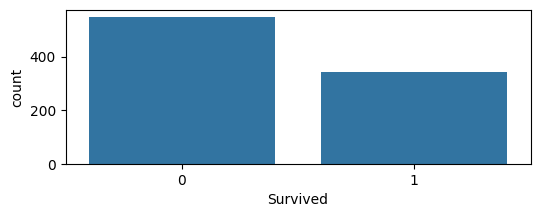

In [47]:
fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(data=df_train, x=target)
plt.show()

In [48]:
df_train[target].value_counts(normalize=True).mul(100)

Survived
0    61.573034
1    38.426966
Name: proportion, dtype: float64

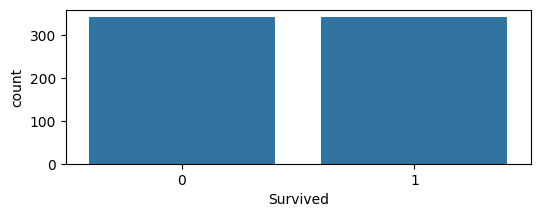

684 observaciones para entrenar


In [49]:
df_survived = df_train[df_train[target] == 1]
df_no_survived = df_train[df_train[target] == 0]

# se selecciona de forma aleatoria el mismo número de dias de no lluvia que días de lluvia para equilibrar el dataset, sin posibilidad de repetir, con sample
df_no_survived = df_no_survived.sample(len(df_survived), replace=False, random_state=42)

# se juntan los dataframes de lluvia y no lluvia en el df_train con concat
df_train = pd.concat([df_survived, df_no_survived])

fig, ax = plt.subplots(figsize=(6, 2))
sns.countplot(data=df_train, x=target)
plt.show()

print(len(df_train), 'observaciones para entrenar')

## FEATURE IMPORTANCE

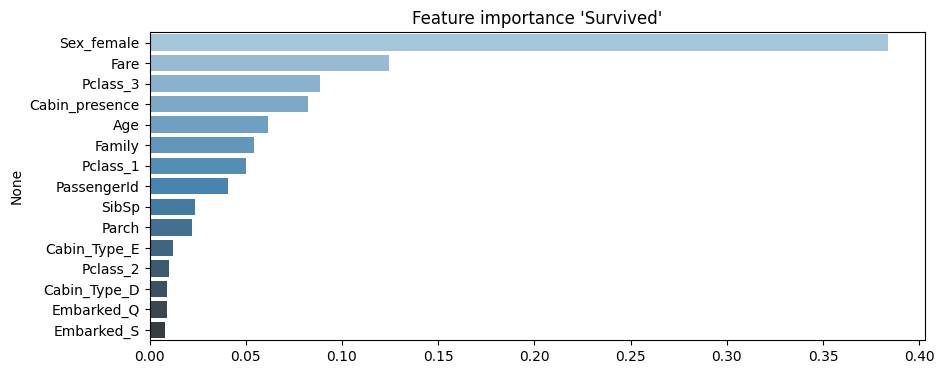

In [50]:
params = {'random_state': 42, 'n_jobs': 4, 'n_estimators': 100, 'max_depth': 4}

x, y = df_train.drop(target,axis=1), df_train[target]
# entrena un RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Plotea las 15 mejores Features importances
num_features = 15
features = clf.feature_importances_
columnas = x.columns
imp = pd.Series(data=features, index=columnas).sort_values(ascending=False)[:num_features]
plt.figure(figsize=(10,4))
plt.title("Feature importance '{}'".format(target))
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')
plt.show()

# SPLIT_TRAIN_TEST

In [51]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 1 to 675
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     684 non-null    int64  
 1   Survived        684 non-null    int64  
 2   Age             684 non-null    float64
 3   SibSp           684 non-null    int64  
 4   Parch           684 non-null    int64  
 5   Fare            684 non-null    float64
 6   Cabin_presence  684 non-null    int64  
 7   Family          684 non-null    int64  
 8   Sex_female      684 non-null    int64  
 9   Embarked_C      684 non-null    int64  
 10  Embarked_Q      684 non-null    int64  
 11  Embarked_S      684 non-null    int64  
 12  Cabin_Type_A    684 non-null    int64  
 13  Cabin_Type_B    684 non-null    int64  
 14  Cabin_Type_C    684 non-null    int64  
 15  Cabin_Type_D    684 non-null    int64  
 16  Cabin_Type_E    684 non-null    int64  
 17  Cabin_Type_F    684 non-null    int64  


In [52]:
df_predecir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   Cabin_presence  418 non-null    int64  
 6   Family          418 non-null    int64  
 7   Sex_female      418 non-null    int64  
 8   Embarked_C      418 non-null    int64  
 9   Embarked_Q      418 non-null    int64  
 10  Embarked_S      418 non-null    int64  
 11  Cabin_Type_A    418 non-null    int64  
 12  Cabin_Type_B    418 non-null    int64  
 13  Cabin_Type_C    418 non-null    int64  
 14  Cabin_Type_D    418 non-null    int64  
 15  Cabin_Type_E    418 non-null    int64  
 16  Cabin_Type_F    418 non-null    int64  
 17  Cabin_Type_G    418 non-null    int

In [53]:
PassengerId = df_predecir["PassengerId"]

In [54]:
# se guarda la target como 'y' y las features como 'X'
X = df_train.drop(target, axis=1)
y = df_train[target]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
print('nº observaciones de train:', len(y_train))
print('nº observaciones de test: ', len(y_test))

nº observaciones de train: 478
nº observaciones de test:  206


In [57]:
X

,PassengerId,Age,SibSp,Parch,Fare,Cabin_presence,Family,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Cabin_Type_A,Cabin_Type_B,Cabin_Type_C,Cabin_Type_D,Cabin_Type_E,Cabin_Type_F,Cabin_Type_G,Pclass_1,Pclass_2,Pclass_3
1,2,38.0,1,0,71.2833,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1
3,4,35.0,1,0,53.1000,1,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0
8,9,27.0,0,2,11.1333,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1
9,10,14.0,1,0,30.0708,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,812,39.0,0,0,24.1500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
623,624,21.0,0,0,7.8542,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
515,516,47.0,0,0,34.0208,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
232,233,59.0,0,0,13.5000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [58]:
y

1      1
2      1
3      1
8      1
9      1
      ..
811    0
623    0
515    0
232    0
675    0
Name: Survived, Length: 684, dtype: int64

In [59]:
# repartición de la target en el data set de train
y_train.value_counts(normalize=True).mul(100)

Survived
0    51.882845
1    48.117155
Name: proportion, dtype: float64

## ESTANDARIZACIÓN


In [60]:
variables_entrenadas = X.columns.tolist()

In [61]:
variables_entrenadas

['PassengerId',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin_presence',
 'Family',
 'Sex_female',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Cabin_Type_A',
 'Cabin_Type_B',
 'Cabin_Type_C',
 'Cabin_Type_D',
 'Cabin_Type_E',
 'Cabin_Type_F',
 'Cabin_Type_G',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3']

In [62]:
# se estandarizan las variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # estandariza y define la regla de estandarización
X_test = scaler.transform(X_test)         # estandariza según la regla definida con el X_train, con la media de X_train

# se estandarizan las variables del dataset a predecir según la regla definida con el X_train
X_predecir = scaler.transform(df_predecir)

# SELECCIÓN Y EVALUACIÓN DE MODELO

## COMPETICIÓN MODELOS

In [63]:

modelos = []
modelos.append(('Perceptron', Perceptron(random_state=42)))
modelos.append(('SGDClassifier', SGDClassifier(loss='log_loss', random_state=42)))
modelos.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=42)))
modelos.append(('XGBClassifier', XGBClassifier(random_state=42, verbosity=0)))
modelos.append(('CatBoostClassifier', CatBoostClassifier(verbose=False, random_seed=42)))
modelos.append(('LogisticRegression', LogisticRegression(random_state=42)))

In [64]:
metricas_modelos = pd.DataFrame(columns=['modelo', 'AUC'])

for nombre, modelo in modelos:

    # entrenamos el modelo
    modelo.fit(X_train, y_train)

    # hacemos la predicción sobre el dataset de test
    # al AUC se saca con predict_proba.
    # para el perceptron, usaremos decision_function, el equivalente del predict_proba para este algoritmo
    if nombre == 'Perceptron':
      y_pred = modelo.decision_function(X_test)
    else:
      y_pred = modelo.predict_proba(X_test)[:, 1]

    # calculamos el AUC
    auc = metrics.roc_auc_score(y_test, y_pred)

    # imprimimos el resultado por modelo
    metricas_modelos = pd.concat([metricas_modelos,
                                  pd.DataFrame({'modelo': nombre, 'AUC': auc}, index=[0])
                                  ])
    print(modelo, auc)

metricas_modelos.sort_values('AUC', ascending=False)

Perceptron(random_state=42) 0.834251519756839
SGDClassifier(loss='log_loss', random_state=42) 0.7865691489361702
GradientBoostingClassifier(random_state=42) 0.8726728723404255
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) 0.8556231003039513
<catboost.core.CatBoostClassifier object at 0x12b

,modelo,AUC
0,CatBoostClassifier,0.875665
0,GradientBoostingClassifier,0.872673
0,LogisticRegression,0.870726
0,XGBClassifier,0.855623
0,Perceptron,0.834252
0,SGDClassifier,0.786569


## HIPERPARAMETRIZACIÓN

In [65]:
modelo = CatBoostClassifier()

In [66]:
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1],
              'iterations': [300, 500, 800, 1000, 1200],
              'max_depth': [4, 5, 6, 7],
              'eval_metric': ['Logloss', 'AUC'],
              'verbose': [False]}

In [67]:
# # # se prueban todas las combinaciones de parametros
# modelo_grid = GridSearchCV(modelo, parameters,cv=2,verbose=True)

# modelo_grid.fit(X_train, y_train)

# # # se imprime el modelo con los mejores parametros
# print('mejores parametros:')
# modelo_grid.best_params_

In [68]:
# selección del mejor modelo con los mejores parámetros
modelo =  CatBoostClassifier(
    verbose=False, 
    random_seed=42, 
    iterations= 500,
    eval_metric= 'Logloss', 
    learning_rate= 0.01, 
    max_depth= 5)

# entrenamiento
modelo.fit(X_train, y_train)

## EVALUACIÓN

In [69]:
# evalucación sobre el dataset de train

# predicción en el dataset de train
y_pred_train = modelo.predict_proba(X_train)

# evaluación de la métrica
auc_train = metrics.roc_auc_score(y_train, y_pred_train[:,1])
print('auc train:', auc_train)

auc train: 0.9402524544179524


In [70]:
# evalucación sobre el dataset de test

# predicción en el dataset de test
y_pred_test = modelo.predict_proba(X_test)

# evaluación de la métrica
auc_test = metrics.roc_auc_score(y_test, y_pred_test[:,1])
print('auc test:', auc_test)

auc test: 0.8850683890577508


In [71]:
y_train_pred = modelo.predict(X_train)                        # predicciones del modelo en los datos de TRAIN
y_test_pred = modelo.predict(X_test)                          # predicciones del modelo en los datos de TEST

In [72]:
y_train_pred_proba = modelo.predict_proba(X_train)[:, 1]      # probabilidad de éxito (1) segun el modelo en los datos de TRAIN
y_test_pred_proba = modelo.predict_proba(X_test)[:, 1]        # probabilidad de éxito (1) segun el modelo en los datos de TEST

In [73]:
# metricas para la curva ROC
fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_test_pred_proba)

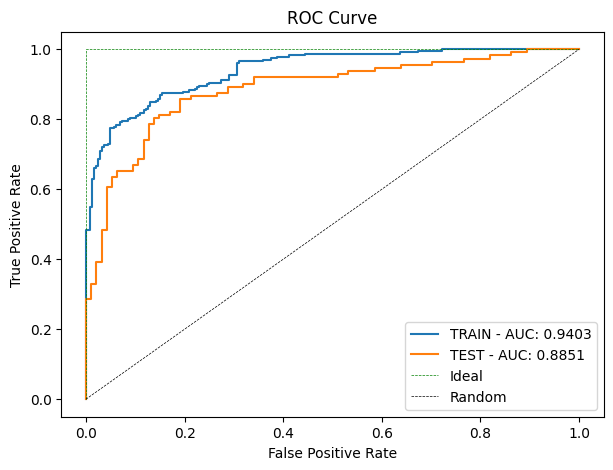

In [74]:
#Plot
plt.figure(figsize=[7,5])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [75]:
# creamos la matriz de confusión
cm_test = metrics.confusion_matrix(y_test, y_test_pred)

[]

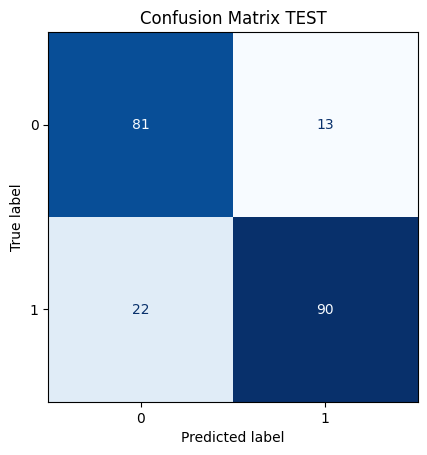

In [76]:
# gráfico de la matriz de confusión en cantidades
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot(colorbar = False, cmap = 'Blues')

plt.title('Confusion Matrix TEST')
plt.plot()

In [77]:
cm_test

array([[81, 13],
       [22, 90]])

In [78]:
# creamos las variables de true positive, true negative, ...
TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
total = len(y_test)

In [79]:
accuracy_sklearn = metrics.accuracy_score(y_test, y_test_pred)
precision_sklearn = metrics.precision_score(y_test, y_test_pred)
recall_sklearn = metrics.recall_score(y_test, y_test_pred)
f1_score_sklearn = metrics.f1_score(y_test, y_test_pred)

In [80]:
print('accuracy:', round(accuracy_sklearn,4))
print('precision:', round(precision_sklearn, 4))
print('recall:', round(recall_sklearn, 4))
print('f1_score:', round(f1_score_sklearn, 4))

accuracy: 0.8301
precision: 0.8738
recall: 0.8036
f1_score: 0.8372


## MODELO ARBOL DE DECISIÓN

In [81]:
# creamos un dataframe con los datos de X_test y las variables como columnas (por eso las guardamos antes)
df_X_test = pd.DataFrame(X_test, columns=variables_entrenadas)
df_X_test

,PassengerId,Age,SibSp,Parch,Fare,Cabin_presence,Family,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Cabin_Type_A,Cabin_Type_B,Cabin_Type_C,Cabin_Type_D,Cabin_Type_E,Cabin_Type_F,Cabin_Type_G,Pclass_1,Pclass_2,Pclass_3
0,-0.113221,-1.498156,-0.495731,2.048656,-0.232184,-0.582182,0.701389,1.215189,-0.507833,-0.318406,0.650092,-0.130466,-0.285391,-0.285391,-0.197814,-0.192032,-0.091863,-0.06482,-0.624127,-0.494764,0.954987
1,0.526247,-0.887784,-0.495731,2.048656,0.842260,1.717677,0.701389,1.215189,-0.507833,-0.318406,0.650092,-0.130466,-0.285391,-0.285391,-0.197814,5.207461,-0.091863,-0.06482,1.602237,-0.494764,-1.047135
2,0.376011,-0.811487,0.463619,-0.508152,-0.196369,-0.582182,0.055408,1.215189,-0.507833,-0.318406,0.650092,-0.130466,-0.285391,-0.285391,-0.197814,-0.192032,-0.091863,-0.06482,-0.624127,2.021165,-1.047135
3,-0.510000,-0.430004,0.463619,-0.508152,-0.196369,-0.582182,0.055408,1.215189,-0.507833,-0.318406,0.650092,-0.130466,-0.285391,-0.285391,-0.197814,-0.192032,-0.091863,-0.06482,-0.624127,2.021165,-1.047135
4,0.903765,-1.192970,4.301020,2.048656,0.208241,-0.582182,3.931293,-0.822917,-0.507833,-0.318406,0.650092,-0.130466,-0.285391,-0.285391,-0.197814,-0.192032,-0.091863,-0.06482,-0.624127,-0.494764,0.954987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1.030050,0.004819,-0.495731,-0.508152,-0.408354,-0.582182,-0.590572,-0.822917,1.969150,-0.318406,-1.538245,-0.130466,-0.285391,-0.285391,-0.197814,-0.192032,-0.091863,-0.06482,-0.624127,2.021165,-1.047135
202,-1.704188,1.858893,-0.495731,-0.508152,0.304312,1.717677,-0.590572,-0.822917,-0.507833,-0.318406,0.650092,-0.130466,-0.285391,-0.285391,-0.197814,5.207461,-0.091863,-0.06482,1.602237,-0.494764,-1.047135
203,0.383715,0.256665,0.463619,0.770252,-0.302362,-0.582182,0.701389,-0.822917,-0.507833,-0.318406,0.650092,-0.130466,-0.285391,-0.285391,-0.197814,-0.192032,-0.091863,-0.06482,-0.624127,-0.494764,0.954987
204,1.073262,0.004819,-0.495731,-0.508152,-0.549919,-0.582182,-0.590572,1.215189,-0.507833,3.140643,-1.538245,-0.130466,-0.285391,-0.285391,-0.197814,-0.192032,-0.091863,-0.06482,-0.624127,-0.494764,0.954987


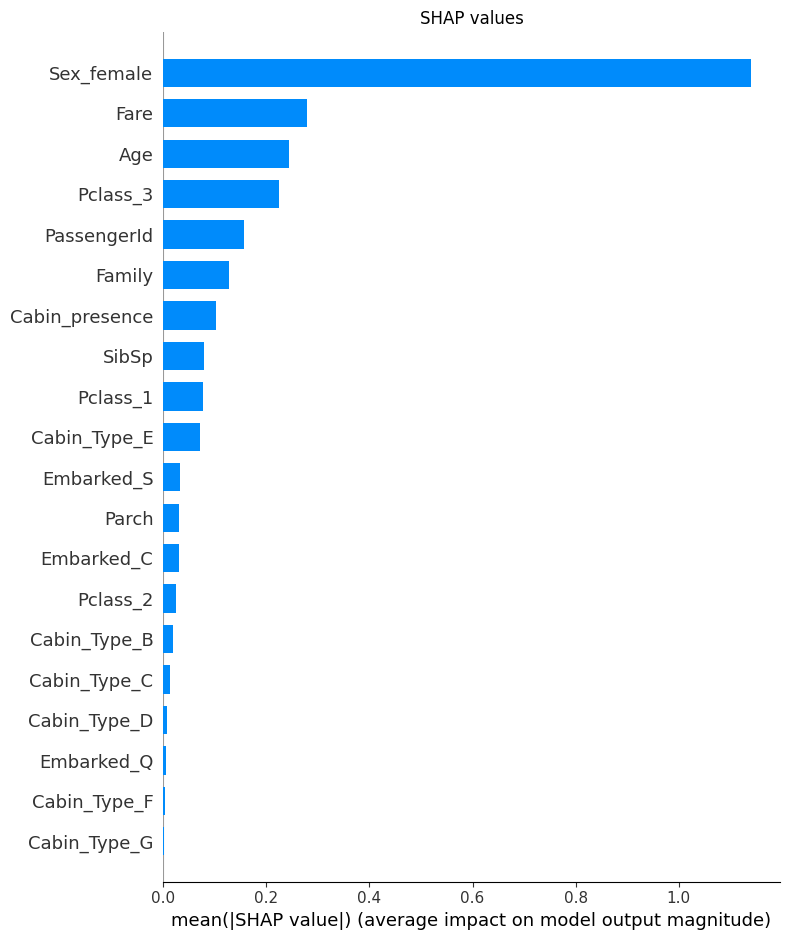

In [82]:
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(df_X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, df_X_test, plot_type="bar", max_display=20)

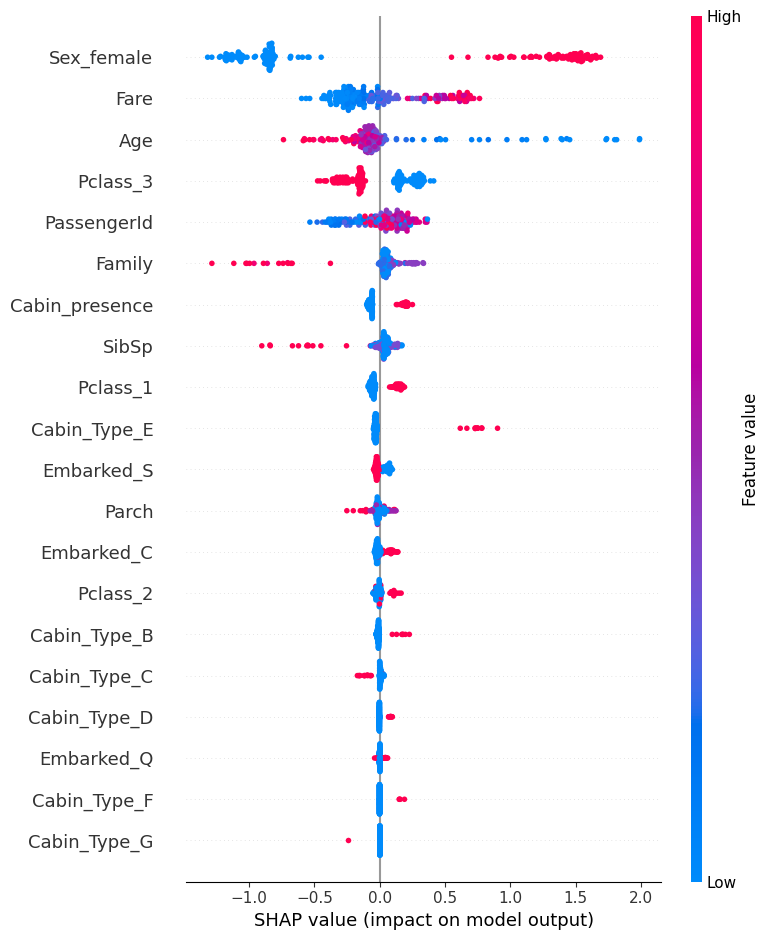

In [83]:
shap.summary_plot(shap_values, df_X_test)

# PREDICCIÓN


In [84]:
df_predecir

,PassengerId,Age,SibSp,Parch,Fare,Cabin_presence,Family,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Cabin_Type_A,Cabin_Type_B,Cabin_Type_C,Cabin_Type_D,Cabin_Type_E,Cabin_Type_F,Cabin_Type_G,Pclass_1,Pclass_2,Pclass_3
0,892,34.50000,0,0,7.8292,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,893,47.00000,1,0,7.0000,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,894,62.00000,0,0,9.6875,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
3,895,27.00000,0,0,8.6625,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,896,22.00000,1,1,12.2875,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,30.27259,0,0,8.0500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
414,1306,39.00000,0,0,108.9000,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0
415,1307,38.50000,0,0,7.2500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
416,1308,30.27259,0,0,8.0500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [85]:
predicciones = modelo.predict(df_predecir)

In [86]:
X_predecir

array([[ 1.70502661,  0.37110959, -0.49573114, ..., -0.6241273 ,
        -0.49476425,  0.95498691],
       [ 1.70887883,  1.32481675,  0.463619  , ..., -0.6241273 ,
        -0.49476425,  0.95498691],
       [ 1.71273105,  2.46926535, -0.49573114, ..., -0.6241273 ,
         2.02116461, -1.04713477],
       ...,
       [ 3.30369809,  0.67629588, -0.49573114, ..., -0.6241273 ,
        -0.49476425,  0.95498691],
       [ 3.30755031,  0.04857272, -0.49573114, ..., -0.6241273 ,
        -0.49476425,  0.95498691],
       [ 3.31140253,  0.04857272,  0.463619  , ..., -0.6241273 ,
        -0.49476425,  0.95498691]])

In [87]:
predict = modelo.predict(X_predecir)

predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [88]:
len(predict)

418

In [89]:
df_predicciones = pd.DataFrame()

In [90]:
df_predicciones["PassengerId"] = PassengerId 
df_predicciones["Survived"] = predict

df_predicciones

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [91]:
df_predicciones["Survived"].value_counts()

Survived
0    238
1    180
Name: count, dtype: int64

In [92]:
df_predicciones.to_csv('Titanic_submission.csv', index=False)